In the last two notebooks we have learned hot to build a deep neural network and how to train it to fit our data. Sometimes howeveer, we go out there and train on ourselves and find out that nothing works as planned, because there are many things that can fail. Our architecture can be poorly chosen, our data can be noisy, our model could maybe be taking years to run and we need it to run faster. 

We need to learn ways to optimize the training of our models and this is what we will do here! 

### Testing

Let's start with two classification models:

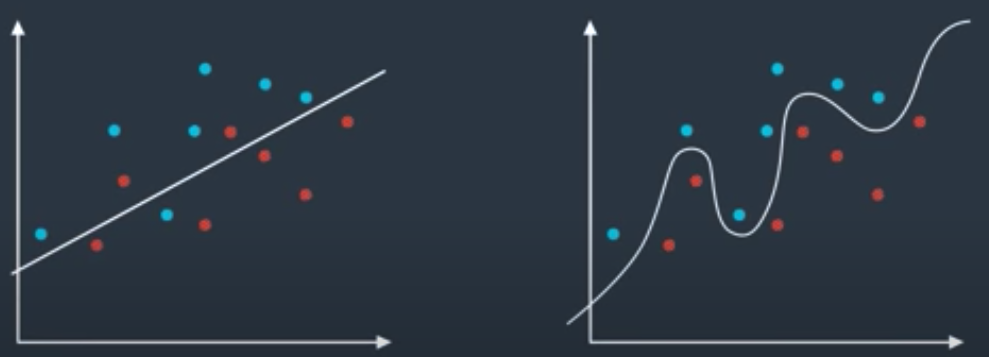

Both separate the blue points from the red points. Which of these two models is better? 

It seems like the one on the left is simpler since it is a line and the one on the right is more complicated since it is a complex curve. The one in the right makes no mistakes, it correctly separates all the points. On the other hand, the one in the left does make some mistakes. So we are inclined to think that the one in the right is better.

In order to really find out which one is better, we introduce the concept of training and testing sets. We will denote them as: 
- solid color points: training set
- white inside points: testing set

And what we will do is train our models in the training set without looking at the testing set and then we will evaluate the results on that testing to see how we did.

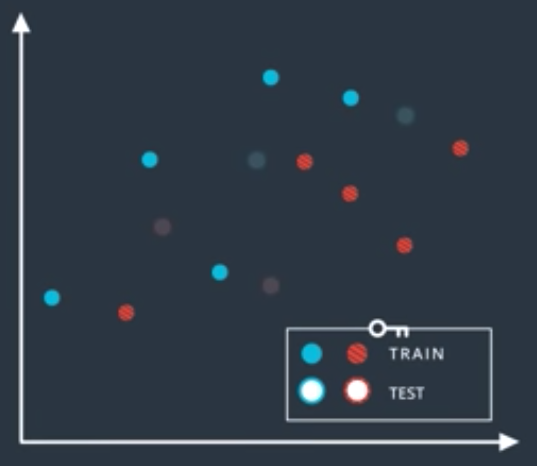

According with this, we trained the linear model and the complex model on the training set to obtain these two boundaries:

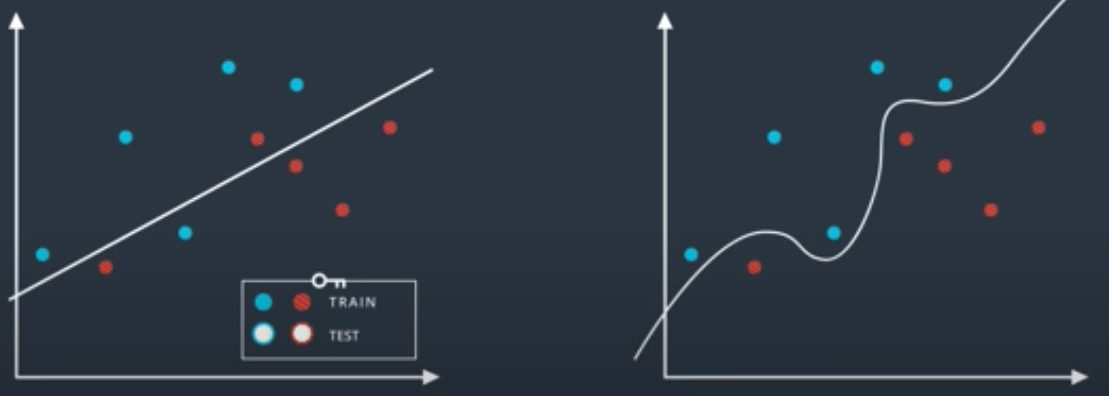

Now we reintroduce the testing set and we can see that the model in the left made one mistake while the model in the right made two mistakes:

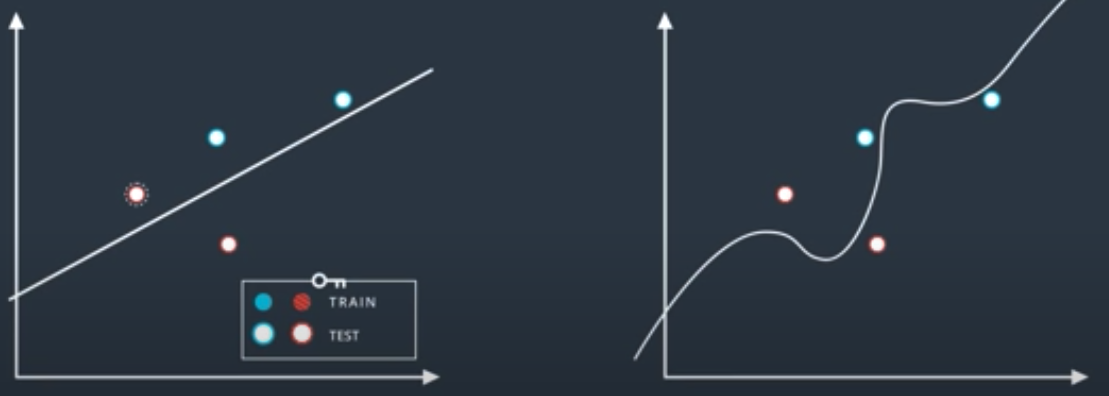

So in the end, the simpler model was better. Does that match our intuition? Well, it does, because in machine learning that is what wee are going to do. Whenever we can choose between a simple model that does the job and a complicated model that may to the job a little bit better, we always try to go for the simpler model. 

### Overfitting and Underfitting

In life there are two mistakes one can make: One is to try to killl Godzilla using a flyswatter, the other one is to try to kill a fly using a bazooka. 

What's the problem with the first mistake? That we are oversimpliflying the problem, we are trying a solution that is too simple and won't do the job. In machine learning, this is called **underfitting**.

What's the problem with the second mistake? That we are overly complicating the problem and it will lead us to bad solutions and extra complexity when we can use a much simpler solution instead. In machine learning, this is called **overfitting**.

Let's loook at how overfitting or underfitting can  occur in a classification problem, for that we use the following data:

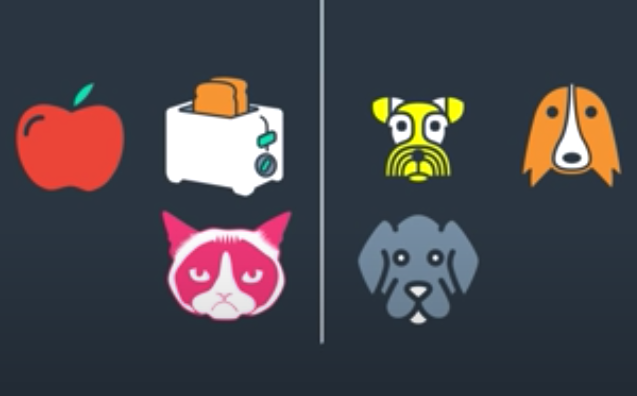

We want to classlify that data, what is the rule that will do the job there? Look easy, the ones in the right are dogs while the ones int the left are anything but dogs. 

What happens if we use the next rule? We say that the ones in the right are animals and the ones in the left are anything but animals. That solution is not too good, the problem is that it is too simple. It doesn't even get the whole data set right, it misclassify the cat on the left since the cat is an animal. This is **underfitting**. Sometimes we will refer to it as error due to bias.

What happens if we use this other rule? We say that the ones in the right are dogs that are yellow, orange, or gray, and the ones in the left are anything but dogs that are yellow, orange, or gray. Technically, this is correct as it classifies the data correctly. There is a feeling that we went too specific since just saying dogs and not dogs would have done the job. But the problem is more conceptual, we can see the problem here by introducing a testing set. We can add a purple dog in the right, hopping our classifier keeps it into the right, but our clasifier puts it on the left since the dog is not yellow, orange, or gray. The problem is that the classifier is too specific and it will fail to generalize. This is **overfitting**. Sometimes we will refer to it as error due to variance. 

We can think about an analogy: underfitting is like not studying enough and failing, a good model is like studying well and doing well in the exam, overfitting is like instead of studying we memorize the entire textbook word by word so we won't be able to generalize properly and answer the questins in the test.

How this would look in neural networks?

Again we have a set of data, where we have blue points labeled positive and red points labeled negative. And we have three little models. 

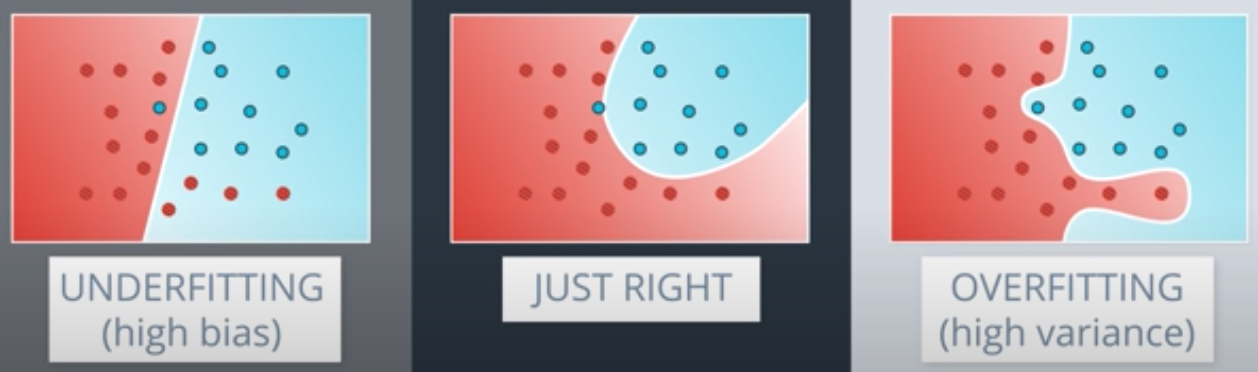

In the middle we have a good model which fits whe data well, on the left we have a model that underfits since it is too simple (it tries to fit the data with the line but the data is more complicated than that), and on the right we have a model that overfits since it tries to fit the data with an overly complicated curve. 

Notice that the model in the right fits the data really well since it makes no mistakes, whereas the one in the middle makes a just one point mistake. But we can see that the model in the middle will probably generalize better. The model in the middle looks at this point as noise while the one in the right gets confused by it and tries to feed it too well.

The model in the middle will have a neural network with a slightly complex architecture, the one in the left will probably be an overly simplistic architecture, the model in the right is probabily a highly complex neural network with more layers and weights than we need.

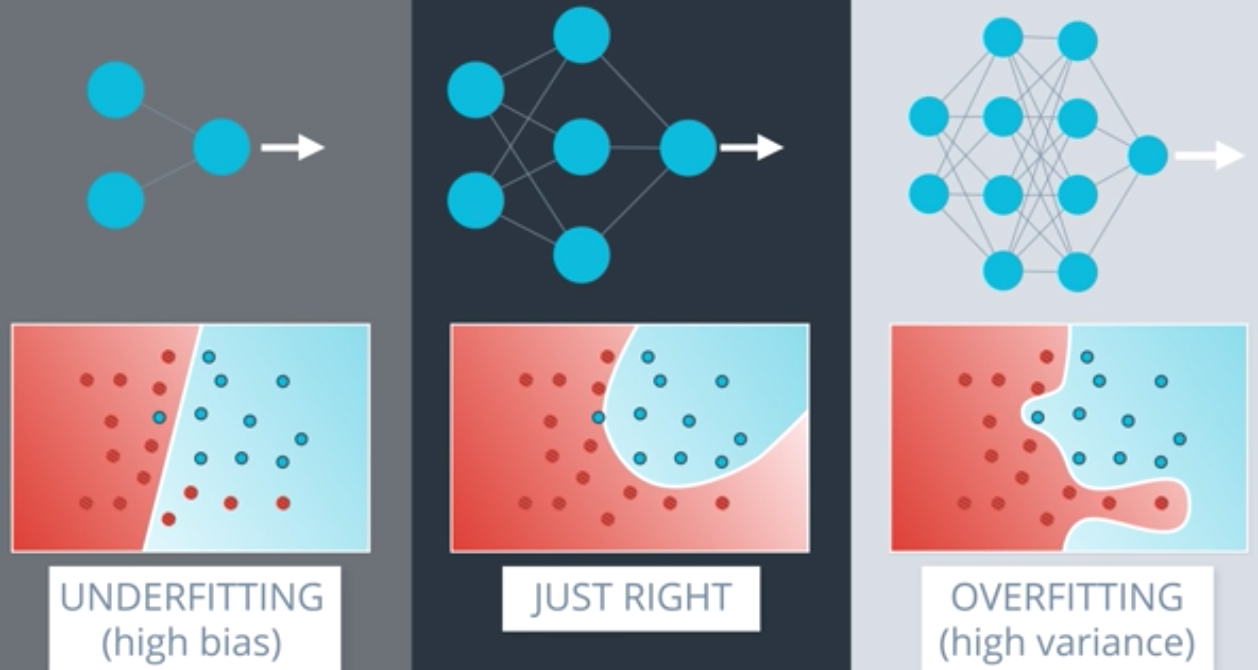

The bad news: It is really hard to find the right architecture for a neural network. We are always going to end either with an overly simplistic architecture as the one in the left or an overly complicated one like the one in the right. So, what do we do? We will err on the side of  an overcomplicated models and then we will apply certain techniques to prevent overfitting on it.

### Early stopping

So, we have a complicated network architecture which would be more complicated than we need but we need to live with it. So, let's look at the process of training.

We start with random weights in her first epoch and we get a model like this one, which makes a lot of mistakes:

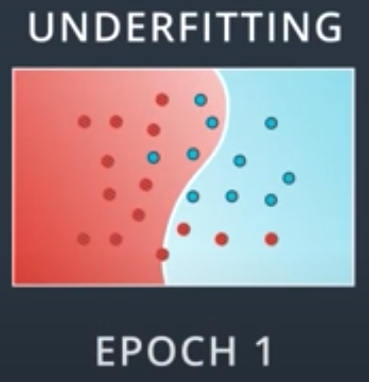

Then as we train, let's say for 20 epochs we get a pretty good model:

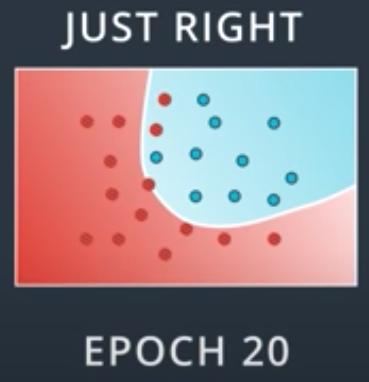

But let's say we keep going for a 100 epochs, we will get something that fits the data much better, but we can see that this is starting to overfit:

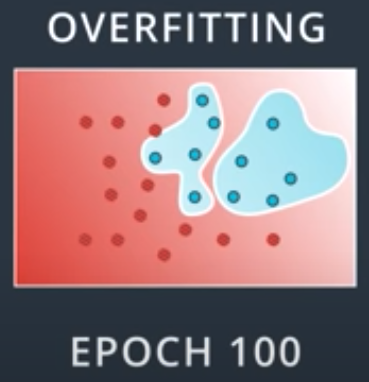

If we go for even more, say 600 epochs, then the model heavily overfits, we can see that the blue region is pretty much a bunch of circles around the blue points. This fits the training data really well, but it generalize horribly, imagine a new blue point in the blue area, this point will most likely be classified as red unless it is super close to a blue point:

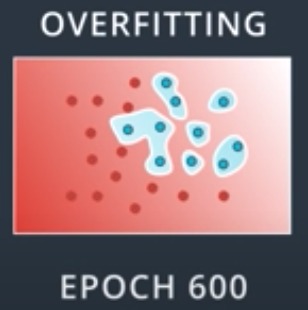

Let's try to evaluate these models by adding a testing set such as these points. Let's make a plot of the error in the training set and the testing set with respect to each epoch:

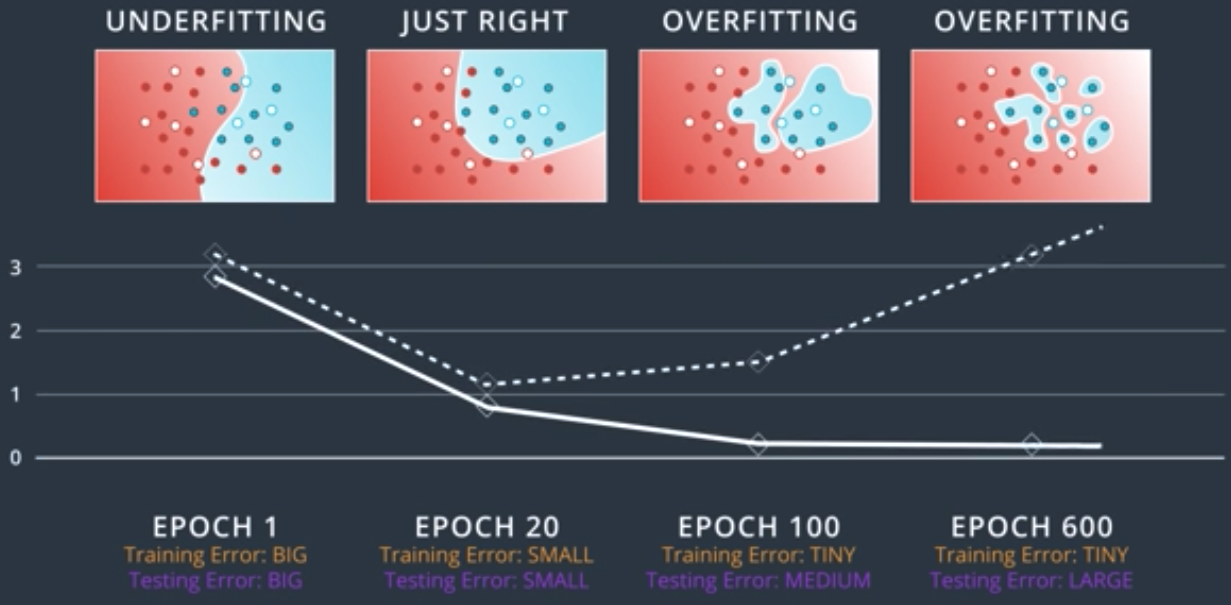

For the first epoch, since the model is completely random, then it badly misclassifies both the training and the testing sets. So, both the training error and the testing error are large. 

For the 20 epoch, we have a much better model which fit the training data pretty well, and it also does well in the testing set. So, both errors are relatively small.

For the 100 epoch, we see that we are starting to overfit. The model fits the data very well but it starts making mistakes in the testing data. We realize that the training error keeps decreasing but the testing error starts increasing.

For the 600 epoch, we are badly overfitting. We see that the training error is very tiny because the data fits the training set really well but the model makes tons of mistakes in the testing data. So, the testing error is large.

Then we draw the curves that connect the training and testing errors. So we see it is quite clear when we stop underfitting and start overfitting, the training curve is always decreasing since as we train the model, we keep fitting the training data better and better. The testing error is large when we are underfitting because the model is not exact. Then it decreases as the model generalizes well until it gets to a minimum point, our desired spot. And finally, once we pass that spot, the model starts overfitting again since it stops generalizing and just starts memorizing the training data. 

That plot is called the model complexity graph, in the Y-axis, we have a measure of the error and in the X-axis we have a measure of the complexity of the model (In this case it is the number of epochs). And as you can see, in the left we have high testing and training error, so we are underfitting, and in the right we have high testing error and low training error, so we are overfitting. And somewhere in the middle we have our happy, desired point. So this determines the number of epochs we will be using. What we do is: we degrade in descent until the testing error stops decreasing and starts to increase, at that moment, we stop. This algorithm is called **Early Stopping** and is widely used to train neural networks.

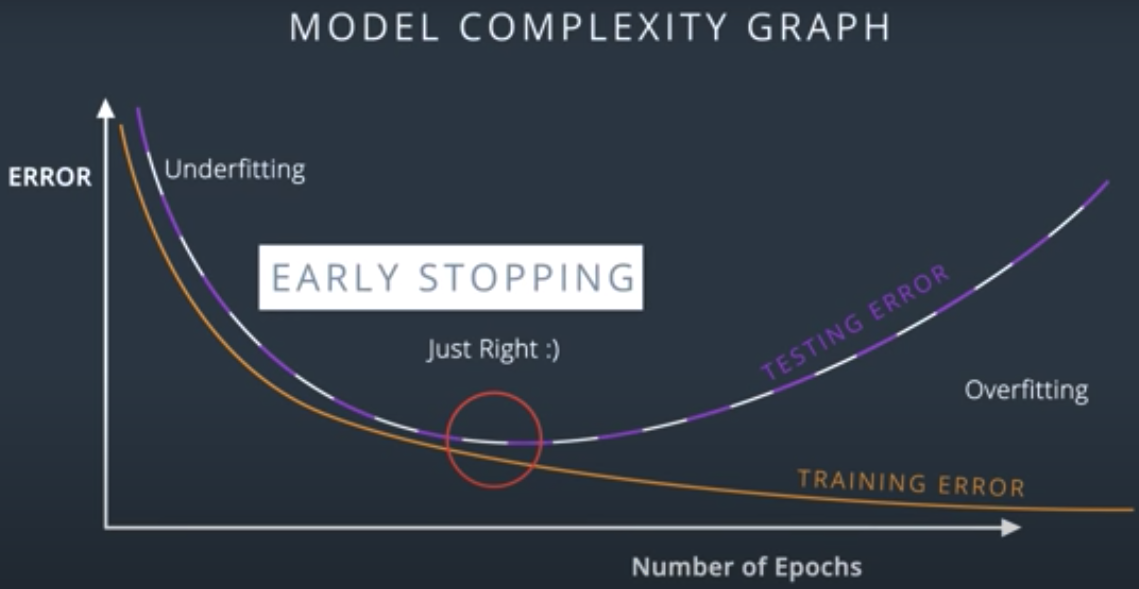

### Regularization

We will review a subtle way of overfitting a model. For that, we will take the simpliest data set in the world, two points, the point one which is blue and the point minus one minus one which is red. Now, we want to separate them with a line. For that there are two equations:

- Solution 1: $x_1 + x_2$, so that means $w_i$ equals to $w_2$ equals 1 and the bias $b$ equals zero
- Solution 2: $10x_1 + 10x_2$, so that means $w_1$ equal $w_2$ equals 10 and the bias $b$ equals zero

Which gives a smaller error?

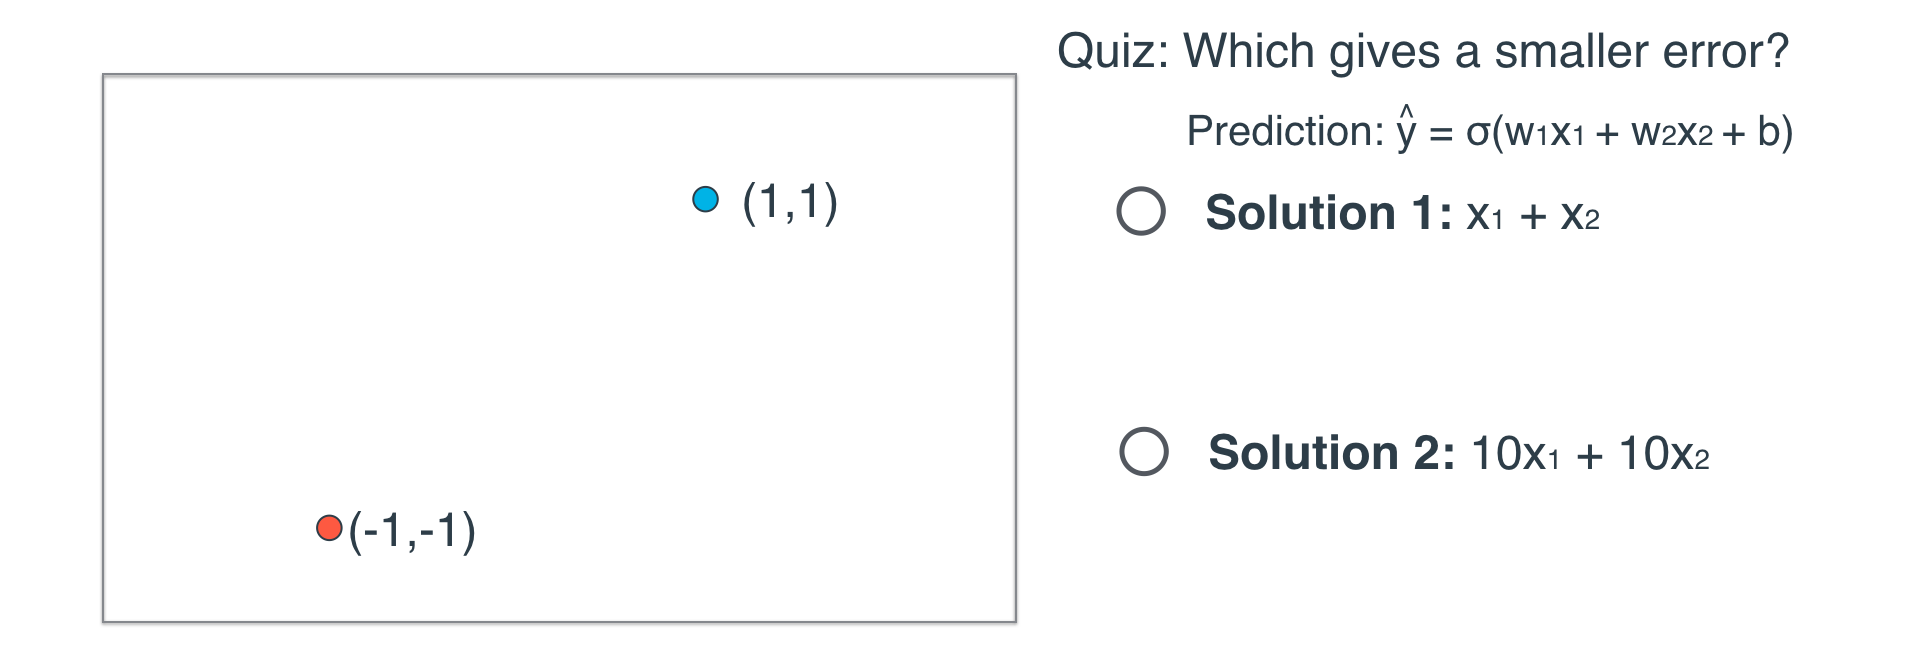

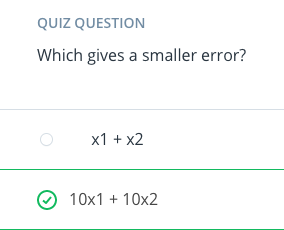

The first observation is that both equations give us the same line, the line with equation $x_1 + x_2 = 0$. And the reason for this is that solution two is really just a scalar multiple of solution one.

Recall that the prediction is a sigmoid of the linear function.

So in the first case for the point $(1,1)$ it would be sigmoid of $(1 + 1) = \sigma(2) = 0.88$. This is not bad since the point is blue, so it has a label of one. For the point $(-1,-1)$ it would be $\sigma(-1 - 1) = \sigma(-2) = 0.12$. It is also not best since a point label has a label of zero since it is red. 

so in the first case for the point $(10,10)$ it would be sigmoid of $(10 + 10) = \sigma(20) = 0.9999999979$. This is really close to 1, so it's a great prediction. For the point $(-10,-10)$ it would be $\sigma(-10 - 10) = \sigma(-20) = 0.0000000021$. That's really, really close to zero so it is a great prediction.

Well, after last sections you may be a bit reluctant since this hit's a bit towards overfitting. And your hunch is correct. The problem is overfitting but in a subtle way. 

Here is what is happening and here is why the first model is better even if it gives a larger error. 

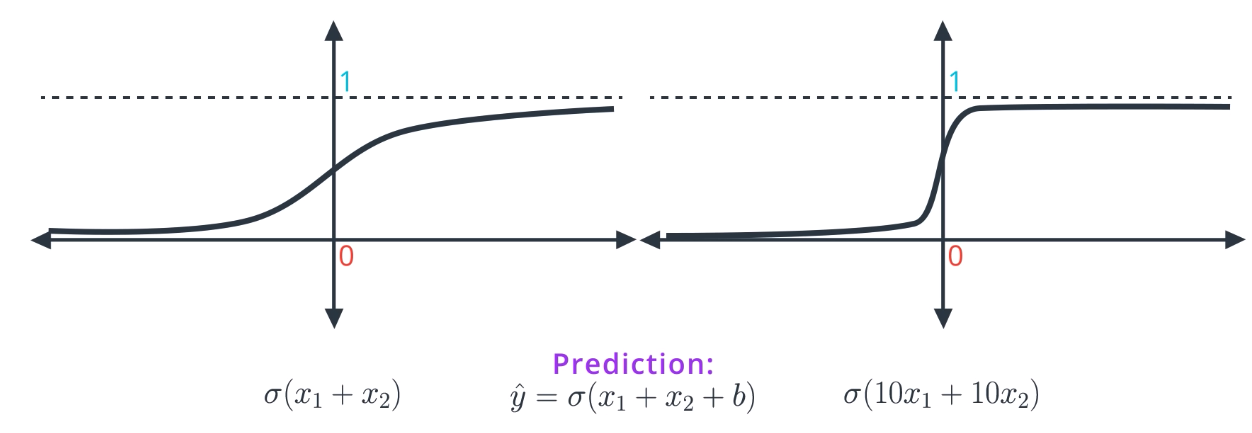

When we apply sigmoid to small values such as $x_1 + x_2$, we get the function on the left which has a nice slope to the gradient descent. When we multiply the linear function by 10 and take the sigmoid function of $10x_1 + 10x_2$, our predictions are much better since they are closer to zero and one. But the function becomes much steeper and it is much harder to do great descent here. Since the derivatives are mostly close to zero and then very large when we get to the middle of the curve. 

Therefore, in order to do gradient descent properly, we want a model like the one in the left more than a model like the one in the right. In a conceptual way, the model in the right is too certain and it gives little room for applying gradient descent. Also, as you can imagine, the points that are classified incorrectly in the model in the right, will generate large errors and it will be hard to tune the model to correct them. This can be summarized in the quote by the famous philosopher and mathematician Bertraind Russell: 

`
The whole problem with Artificial Intelligence is that bad models are so certain of themselves, and good models so full of doubts.
`

How do we prevent this type of overfitting from happening? 

This seems to not be easy since the bad model gives smaller errors. All we have to do is we have to tweak the error function a bit. Basically we want to punish high coefficients. So what we do is we take the old error function and add a term which is big when the weights are big. There are two ways to do this. 

- One way is to add the sums of absolute values of the weights times a constan lambda
$$
E = - \frac{\mathrm{1} }{\mathrm{m} }\ \sum_{i = 1}^m (1 - y_i)ln(1 - \hat{y_i}) +  y_iln(\hat{y_i}) + \lambda(|w_i|+...+|w_n|)\
$$

- The other one is to add the sum of the squares of the weights times that same constant
$$
E = - \frac{\mathrm{1} }{\mathrm{m} }\ \sum_{i = 1}^m (1 - y_i)ln(1 - \hat{y_i}) +  y_iln(\hat{y_i}) + \lambda(w_i^2+...+w_n^2)\
$$

As we can see, these two are large if the weights are large. The lambda parameter will tell us how much we want to penalize the coefficients. If lambda is large, we penalized them a lot. If lambda is small, then we don't penalize them much. And finally, if we decide to go for the absolute values, we are doing L1 regularization, and if we decide to go for the esquares, then we are doing L2 regularization. Both are very popular and depending on our goals or application, we will be applying one of the other. 

Here are some general guidelines for deciding between L1 and L2 regularization:

- L1:
-- We tend to end up with sparse vectors. Small weights will tend to go to zero, so if we want to reduce the number of weights and end up with a small set, we can use L1.
-- A good for feature selections and sometimes we have a problem with hundreds of features, L1 will help us select which ones are important, and it will turn the rest into zeros. 

- L2
-- Tends not to favor sparse vectors since it tries to maintain all the weights homogeneously small. This one normally gives better results for training models so it's the one we will use the most. 

Why would L1 regularization produce vectors with sparse weights, and L2 regularization will produce vectors with smalll homogeneous weights? Here an idea, if we take the vector $(1,0)$, the sums of the absolute values of the weights are one, and the sums of the squares of the weights are also one. But if we take the vector $(0.5,0.5)$, the sums of the absolute values of the weights is still one, but the sums of the squares is $0.25 + 0.25$, which is 0.5. Thus L2 regularization will prefer the vector point $(0.5, 0.5)$ over the vector $$(1, 0), since this one produces a smaller sum of squares. And it turn a smaller fuction. 